In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## This is my custom library, where I have stored all the custom functions
from ml_library import *

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/divya-r-kamat/26-Weeks-Of-Data-Science/master/Week-13-Logistic_regression/data/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
intial_analysis(df)


Display the shape (columns and rows) of the dataset:
	Rows : 303
	Columns : 14

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
disease     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB

Details on Numerical and Categorical features within dataset:

Numeric Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease']
Categorical Columns: []

Print any null values within dataset:



In [5]:
df['disease'].value_counts()

1    165
0    138
Name: disease, dtype: int64

In [6]:
100 * df['disease'].value_counts()/df.shape[0]

1    54.455446
0    45.544554
Name: disease, dtype: float64

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


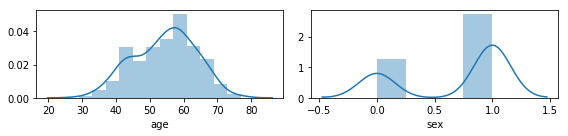

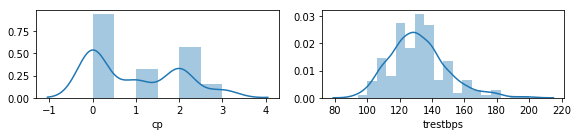

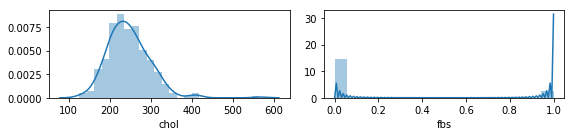

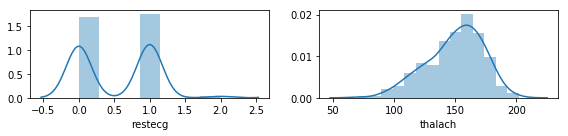

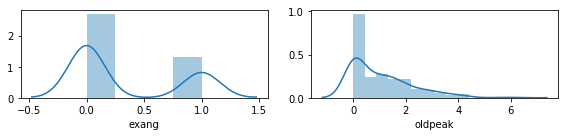

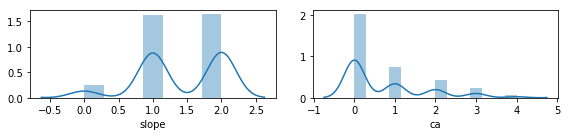

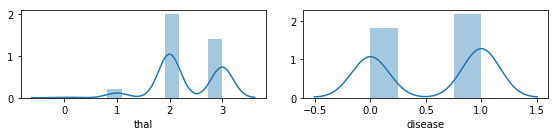

In [7]:
density_plots(df)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

np.random.seed(27)
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [29]:
def correlation_matrix(df):
    X = df.iloc[:,:-1]  #independent columns
    y = df.iloc[:,-1]    #target column i.e price range
    #get correlations of each features in dataset
    corrmat = df.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(10,6))
    #plot heat map
    g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [22]:
def generate_auc_roc_curve(clf, X_test,y_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

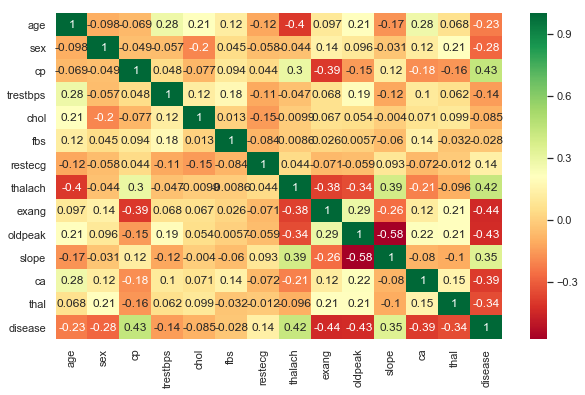

In [30]:
correlation_matrix(df)

In [19]:
target = 'disease'

X = df.loc[:, df.columns!=target]
y = df.loc[:, df.columns==target]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [20]:
clf = LogisticRegression().fit(X_train, y_train)
y_test_pred = clf.predict(X_test)


In [21]:
generate_model_report(y_test, y_test_pred)

Accuracy =  0.8
Precision =  0.8392857142857143
Recall =  0.8103448275862069
F1 Score =  0.8245614035087718


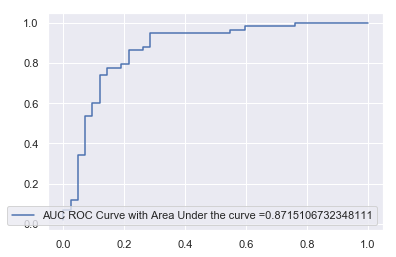

In [23]:
generate_auc_roc_curve(clf, X_test,y_test)


In [25]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.5236842105263158, 1: 0.47631578947368425}}


In [28]:
from sklearn.model_selection import cross_val_score
print("\n\nLog:")
print(cross_val_score(clf, X, y, scoring='accuracy', cv = 10))
accuracy = cross_val_score(clf, X, y, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Logistic Regression is: " , accuracy)



Log:
[0.87096774 0.80645161 0.83870968 0.87096774 0.90322581 0.8
 0.83333333 0.9        0.68965517 0.72413793]
Accuracy of Logistic Regression is:  82.37449017426769


In [31]:
from sklearn.feature_selection import RFE

In [44]:
rfe = RFE(clf, 8)
fit = rfe.fit(X, y)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

# print("Selected Features: %s") % fit.support_
# print("Feature Ranking: %s") % fit.ranking_

8
[False  True  True False False False  True False  True  True  True  True
  True]
[5 1 1 3 6 4 1 2 1 1 1 1 1]
